Airbnb Booking Trends & Host Performance Analysis

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
from google.colab import files
uploaded = files.upload()

Saving 1730285881-Airbnb_Open_Data.xlsx to 1730285881-Airbnb_Open_Data (1).xlsx


In [11]:
df = pd.read_excel("1730285881-Airbnb_Open_Data.xlsx")

In [12]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [13]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

Data Cleaning & Preparation

In [20]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [15]:
df.isnull().sum()


,0
id,0
NAME,270
host id,0
host_identity_verified,289
host name,408
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [41]:
df = df.dropna(axis=1, thresh=len(df)*0.0) # Set the threshold to 0 to keep all columns with at least one non-null value

In [33]:
df[df["neighbourhood group"]=="BrookIn"]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price_usd', 'service_fee_usd', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')


/tmp/ipython-input-1051260146.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Construction year'].fillna(df['Construction year'].median(), inplace=True)


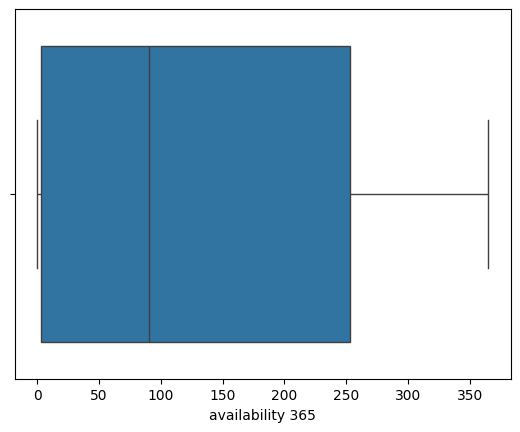

In [48]:
df.drop_duplicates(inplace=True)
print(df.columns)
if 'price' in df.columns:
    df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
    df.rename(columns={'price':'price_usd'}, inplace=True)
if 'service fee' in df.columns:
    df['service fee'] = df['service fee'].replace(r'[\$,]', '', regex=True).astype(float)
    df.rename(columns={'service fee':'service_fee_usd'}, inplace=True)

if 'price_usd' in df.columns and 'service_fee_usd' in df.columns:
    df.dropna(subset=['price_usd','service_fee_usd'], inplace=True)

if 'Construction year' in df.columns:
    df['Construction year'].fillna(df['Construction year'].median(), inplace=True)
    df['Construction year'] = df['Construction year'].astype(int)

if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

if 'id' in df.columns:
    df['id'] = df['id'].astype(str)
if 'host id' in df.columns:
    df['host id'] = df['host id'].astype(str)


if 'neighbourhood group' in df.columns:
    df['neighbourhood group'] = df['neighbourhood group'].replace({'Broaklyn':'Brooklyn'})

if 'availability 365' in df.columns:
    sns.boxplot(x=df['availability 365'])
    df = df[(df['availability 365'] >= 0) & (df['availability 365'] <= 365)]

EXPLORATORY DATA ANALYSIS(EDA)

In [49]:
df.describe()

,lat,long,instant_bookable,Construction year,price_usd,service_fee_usd,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,98873.000000,98873.000000,98873.000000,98873.000000,98873.000000,98873.000000,98873.000000,98873.000000,98873,98873.000000,98873.000000,98873.000000,98873.000000
mean,40.727981,-73.949354,0.497011,2012.491621,625.788517,125.129773,8.138693,27.226756,2019-06-23 15:03:37.915912192,1.290547,3.286438,8.022655,134.353909
min,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,0.000000
25%,40.688690,-73.982520,0.000000,2008.000000,341.000000,68.000000,2.000000,1.000000,2019-01-05 00:00:00,0.290000,2.000000,1.000000,3.000000
50%,40.722170,-73.954320,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,90.000000
75%,40.762650,-73.931920,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-01 00:00:00,1.740000,4.000000,2.000000,253.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,365.000000
std,0.055955,0.049846,0.499994,5.759889,331.296741,66.242896,30.889572,49.171989,NaN,1.635251,1.277425,32.608474,129.536697


What are the different property types in the Dataset?

In [80]:
property_types= df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,51645
Private room,44955
Shared room,2158
Hotel room,115


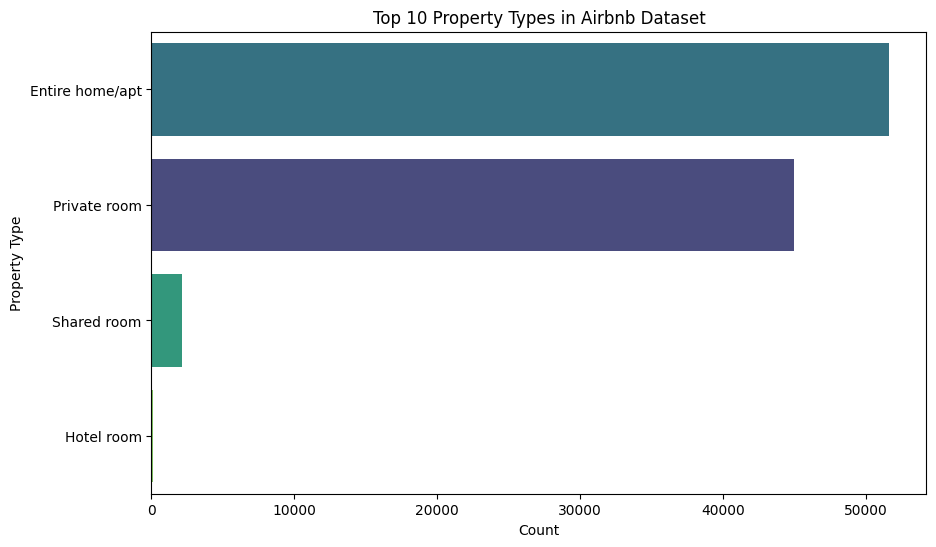

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='room type', order=df['room type'].value_counts().index[:10], palette="viridis")
plt.title("Top 10 Property Types in Airbnb Dataset")
plt.xlabel("Count")
plt.ylabel("Property Type")
plt.show()

Which neighborhood group has the highest number of listings?

In [81]:
hood_group = df["neighbourhood group"].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,42022
Brooklyn,40316
Queens,12947
Bronx,2657
Staten Island,929
brookln,1
manhatan,1


/tmp/ipython-input-1943060468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['neighbourhood group'], palette="Set2")


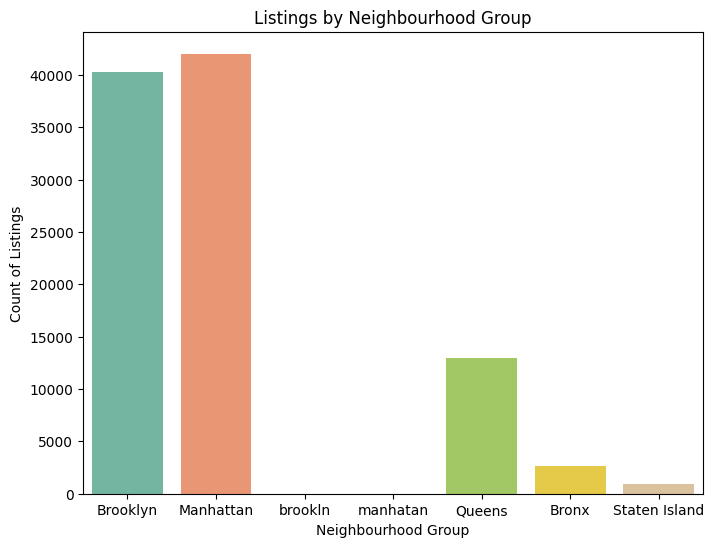

In [63]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['neighbourhood group'], palette="Set2")
plt.title("Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count of Listings")
plt.show()

Which neighborhoods group have the highest average prices?

/tmp/ipython-input-2809809359.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price, x='neighbourhood group', y='price_usd', palette="coolwarm")


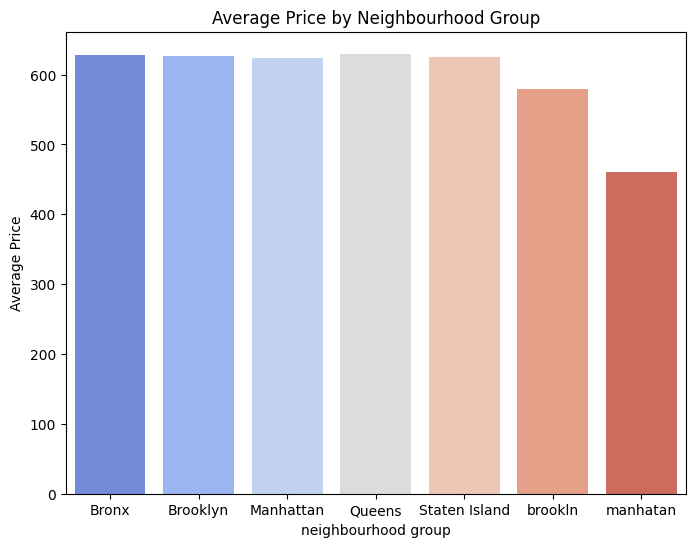

In [65]:
avg_price = df.groupby('neighbourhood group')['price_usd'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=avg_price, x='neighbourhood group', y='price_usd', palette="coolwarm")
plt.title("Average Price by Neighbourhood Group")
plt.ylabel("Average Price")
plt.show()

Relationship between property construction year and price

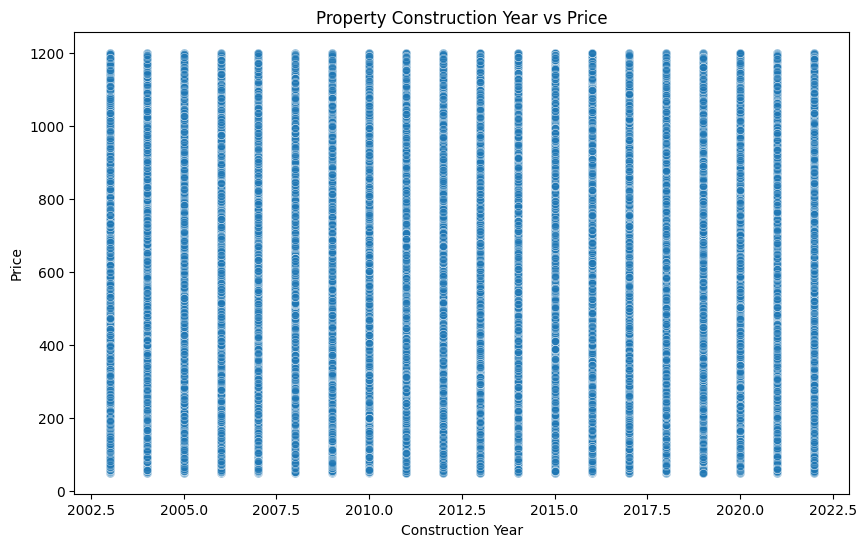

In [67]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Construction year', y='price_usd', alpha=0.5)
plt.title("Property Construction Year vs Price")
plt.xlabel("Construction Year")
plt.ylabel("Price")
plt.show()

Who are the top 10 hosts by calculated host listing count?

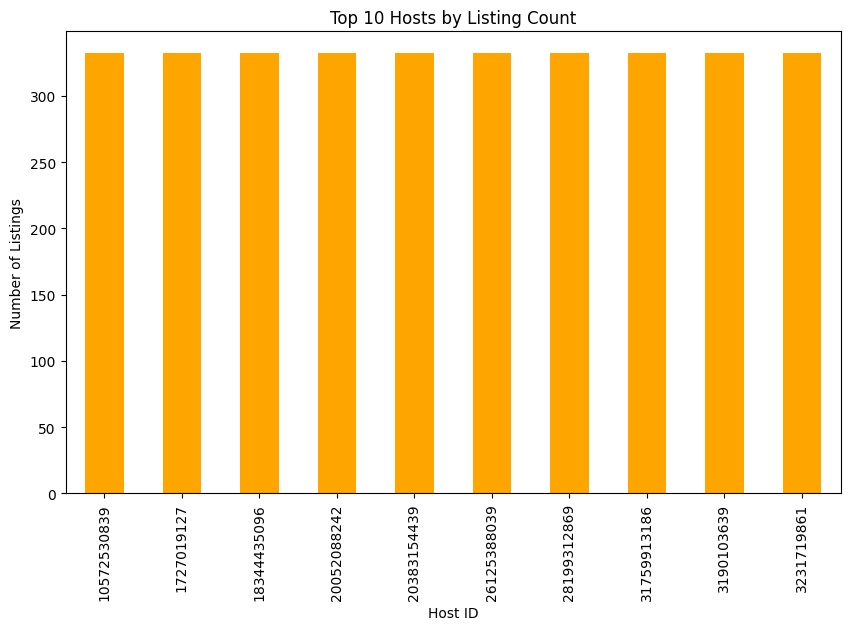

In [69]:
top_hosts = df.groupby('host_id')['calculated_host_listings_count'].sum().nlargest(10)

plt.figure(figsize=(10,6))
top_hosts.plot(kind='bar', color="orange")
plt.title("Top 10 Hosts by Listing Count")
plt.xlabel("Host ID")
plt.ylabel("Number of Listings")
plt.show()


Are hosts with verified identities more likely to receive positive reviews?

In [86]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.291606
unconfirmed,3.281305


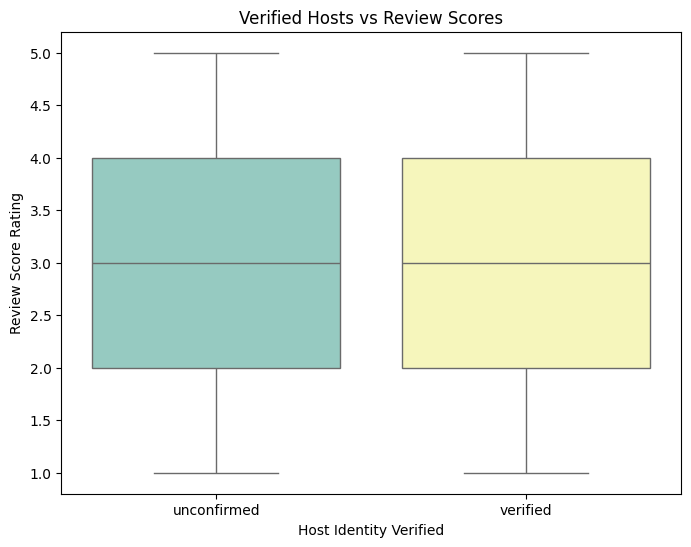

In [73]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='host_identity_verified', y='review rate number', palette="Set3", hue='host_identity_verified', legend=False)
plt.title("Verified Hosts vs Review Scores")
plt.xlabel("Host Identity Verified")
plt.ylabel("Review Score Rating")
plt.show()

Is there a correlation between the price of a listing and its service fee?

In [88]:
df['price_usd'].corr(df['service_fee_usd'])

np.float64(0.9978413280177588)

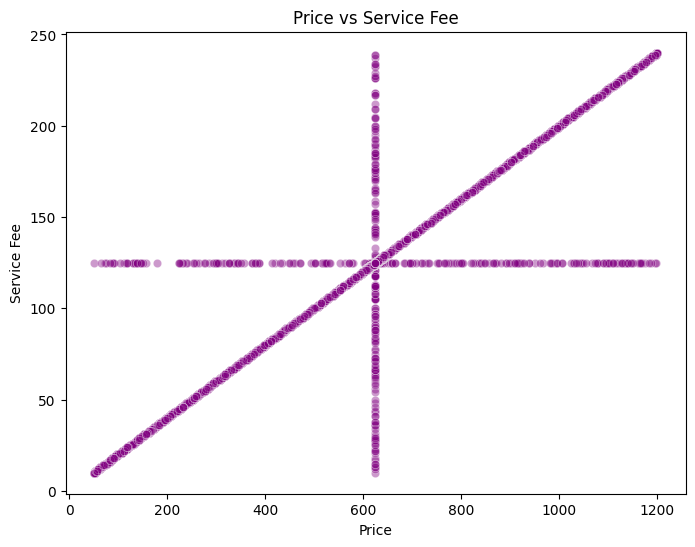

Correlation between Price and Service Fee: 0.9978413280177588


In [74]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='price_usd', y='service_fee_usd', alpha=0.4, color="purple")
plt.title("Price vs Service Fee")
plt.xlabel("Price")
plt.ylabel("Service Fee")
plt.show()

# correlation
print("Correlation between Price and Service Fee:", df['price_usd'].corr(df['service_fee_usd']))

What is the average review rating for listings, and does it vary based on the neighbourhood group and room type?

In [90]:
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.339960
                    Private room               3.339844
                    Shared room                3.260870
Brooklyn            Entire home/apt            3.258810
                    Hotel room                 3.857143
                    Private room               3.271942
                    Shared room                3.333742
Manhattan           Entire home/apt            3.282598
                    Hotel room                 3.500000
                    Private room               3.285860
                    Shared room                3.271777
Queens              Entire home/apt            3.357000
                    Hotel room                 3.750000
                    Private room               3.321537
                    Shared room                3.366477
Staten Island       Entire home/apt            3.326882
                    Private room               3.465479
                    Shared room                3.533333
brookln             Private room               4.000000
manhatan            Private room               3.000000

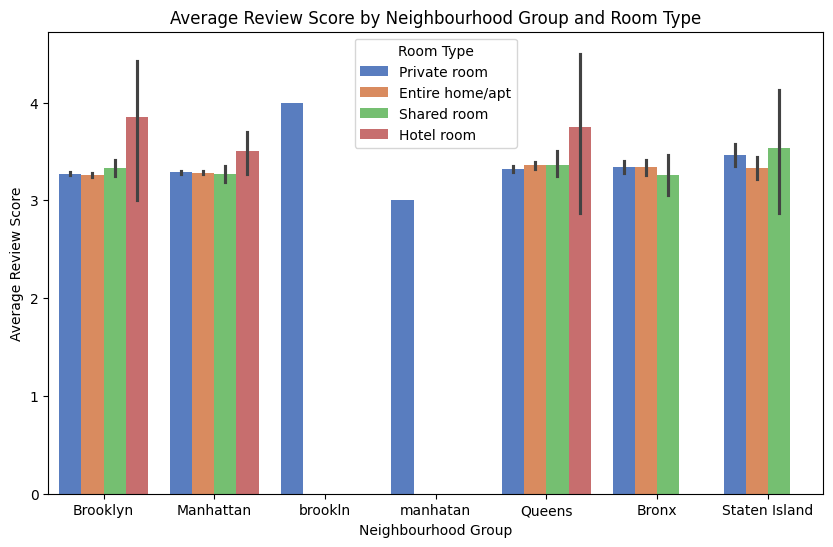

In [76]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type', palette="muted")
plt.title("Average Review Score by Neighbourhood Group and Room Type")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Review Score")
plt.legend(title="Room Type")
plt.show()

Are hosts with higher listing counts more likely to maintain availability throughout the year?

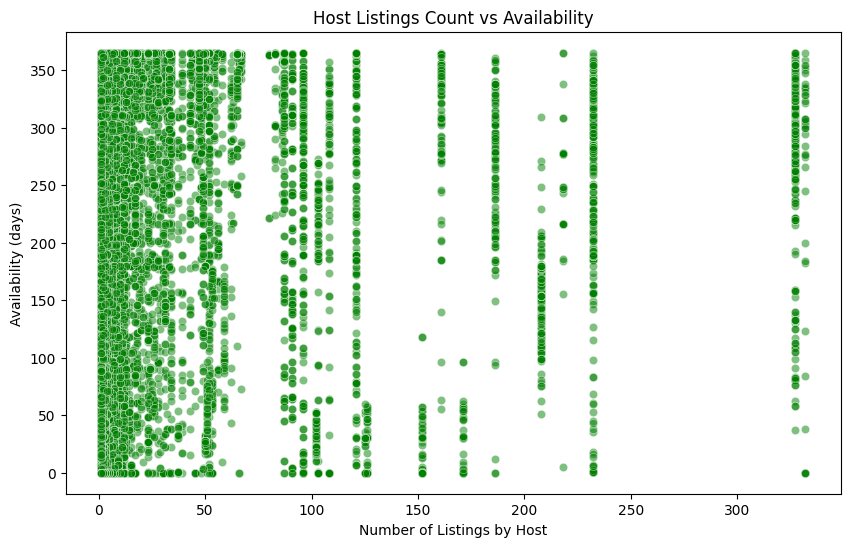

In [78]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='calculated host listings count', y='availability 365', alpha=0.5, color="green")
plt.title("Host Listings Count vs Availability")
plt.xlabel("Number of Listings by Host")
plt.ylabel("Availability (days)")
plt.show()

In [92]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.17439027461989995)

CONCLUSION

The analysis of Airbnb open data revealed several key insights into booking trends, pricing strategies, guest preferences, and host performance.

Booking Patterns: Brooklyn and Manhattan emerged as the most popular areas, with peak activity showing strong demand in urban centers. Entire homes/apartments were the most frequently booked property type, highlighting guest preference for privacy.

Pricing Strategies: Manhattan consistently had the highest average prices, while service fees showed a clear positive correlation with listing price. This indicates that premium properties not only charge higher nightly rates but also impose higher service fees.

Guest Preferences: Guests gave higher ratings to listings offering more amenities and entire-home options. Neighborhood group and room type also influenced satisfaction levels, suggesting that both location and property type play an important role in guest reviews.

Host Performance: Verified hosts generally received better review scores, reflecting the trust factor in guest experiences. High-performing hosts with more listings tended to maintain availability throughout the year, signaling professional hosting practices.

Overall, the project demonstrates that data-driven decision making can help both hosts and Airbnb optimize performance.